This notebook will be mainly used for the capstone project of professional certificate in data science by IBM.

Erickson Figueroa, IT Data Analyst & Data Science Enthusiast.

### Project Description:
**Visit or Invest in Punta Cana, Dominican Republic.**

**Punta Cana**
Is a resort town within the Veron-Punta Cana municipal district, in the municipality of Higüey, in La Altagracia Province, the easternmost province of the Dominican Republic. The area has beaches and balnearios which face both the Caribbean Sea and the Atlantic Ocean, and it is the principal tourist destination in the whole country.

With this project, I'll try to answer two business questions: 
 
1- Which are the most visited venues?  
2- Which neighborhoods have the most venues? 

We will do a statistical analysis to understand the data and found analytical insights, the Machine Learning's K-MEAN algorithm to cluster the venues by neighborhoods and visualize them on a map.

For more details about the entire process open the next links:  

https://github.com/erickson-figueroa/Capstone_Project_DS_IBM/blob/main/Capstone%20Project%20-%20The%20Battle%20of%20Neighborhoods.pdf

### Tools and resources
- numpy: library to handle data in a vectorized manner.
- pandas: library for data analsysis.
- json: library for handle json files.  
- requests: library to handle requests.
- matplotlib: to associated plotting modules.
- folium: map rendering library and vizualization.
- geopy: convert an address into latitude and longitude values
- sklearn: the most useful python machine learning library.
- Foursquare API: to explore the neighborhoods and segment them.
- Population data: population_dr_2010.xls
- Tourist Arrivals: nationality_arrivals_2019.xls


In [5]:
# Installing libraries

# uncoment to install beautifulsoup4 if you don't have and need it.
#!conda install -c conda-forge beautifulsoup4 --yes
# Install the html5, lxml parses for beautifullsoup
#!conda install -c conda-forge html5lib --yes
#!pip install lxml

# To do requests
!conda install -c conda-forge requests --yes
# Map rendering with folium
!conda install -c conda-forge folium --yes
# Convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes

# Importing libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import requests
from geopy.geocoders import Nominatim
#from bs4 import BeautifulSoup
import folium
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [11]:
# reading the excel file population data
df_temp = pd.read_excel('population_dr_2010.xls')
df_temp.head()

,RID,Reg,Prov,Mun,Md,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W
0,0,7,7,1,1,2,4,1,LA JAGUA,-71.721277,18.932071,ELIAS PIÑA,COMENDADOR,COMENDADOR,LA JAGUA,Rural,10,33,24,57
1,1,7,7,1,1,2,8,3,GUAZUMAL,-71.664995,18.884885,ELIAS PIÑA,COMENDADOR,COMENDADOR,EL PINO,Rural,104,231,206,437
2,2,7,7,1,3,2,4,6,LA TINAJA O TINAJITA,-71.705507,18.846651,ELIAS PIÑA,COMENDADOR,GUAYABO (D. M.).,LA MESETA,Rural,166,359,348,707
3,3,7,7,1,1,2,8,5,LA CUNA,-71.695479,18.902046,ELIAS PIÑA,COMENDADOR,COMENDADOR,EL PINO,Rural,9,23,22,45
4,4,7,7,3,1,2,2,8,PALMA CANA,-71.633865,18.855488,ELIAS PIÑA,EL LLANO,EL LLANO,REBOSO,Rural,21,49,44,93


In [12]:
#filtering only for Veron Punta Cana District
df_geo = pd.DataFrame(pd.read_excel('population_dr_2010.xls'))
df_geo_filtered = df_geo[(df_temp.Prov == 11) & (df_temp.Md ==4)]
print(df_geo_filtered.shape)
df_geo_filtered.head()

(43, 20)


,RID,Reg,Prov,Mun,Md,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W
7307,7307,8,11,1,4,1,1,1,LOTIFICACIÓN VERÓN,-68.427363,18.609768,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,320,488,390,878
7308,7308,8,11,1,4,1,1,4,VILLA PROGRESO,-68.435203,18.605049,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,142,229,193,422
7309,7309,8,11,1,4,1,1,6,BELLO AMANECER,-68.444725,18.602414,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,706,983,831,1814
7310,7310,8,11,1,4,1,1,7,EL SAMARITANO,-68.455457,18.599191,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,1097,1541,1537,3078
7311,7311,8,11,1,4,1,1,5,BÁVARO,-68.404431,18.612997,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,8692,12423,8815,21238


In [13]:
# Use geopy library to get the latitude and longitude values of Higuey city

# In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent higuey_explorer, as shown below
address = 'Punta Cana, La Altagracia'
geolocator = Nominatim(user_agent="higuey_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Higuey City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Higuey City are 18.556551, -68.3691611.


In [14]:
# Create a map of Punta Cana with neighborhoods superimposed on top
# Using latitude and longitude values
map_higuey = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add markers to map
for lat, lng, municipal_district, neighborhood in zip(df_geo_filtered['Latitude'], df_geo_filtered['Longitude'], df_geo_filtered['Municipal District'], df_geo_filtered['Neighborhood']):
    label = '{}, {}'.format(neighborhood, municipal_district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_higuey)  
    
map_higuey

In [15]:
# Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

# Define Foursquare Credentials and Version
#CLIENT_ID = 'IRNBQ5Y3K0VF1DB5E33S5EWCKNZEEAZ3FNXL2MY041XXGRJI' # your Foursquare ID
CLIENT_ID = 'BKKIV5XLLELYF5MOJUBK5NNTSBOXQYYNM2P0THHLLXW3YA5R'
#CLIENT_SECRET = 'UJQ4GIC51NNRP33IT2A3DPRRGNGFQHW1Y3GMR3H22WF51LIY' # your Foursquare Secret
CLIENT_SECRET = 'IDZJTUXBJOU1R3P5OJIOCHBQU5N01JK22XR1V225HXSOLNBX'
VERSION = '20180605' # Foursquare API version
#LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BKKIV5XLLELYF5MOJUBK5NNTSBOXQYYNM2P0THHLLXW3YA5R
CLIENT_SECRET:IDZJTUXBJOU1R3P5OJIOCHBQU5N01JK22XR1V225HXSOLNBX


In [16]:
# For more easy analysis let's get the top 100 venues that are in Punta Cana within a radius of 1000 meters.

LIMIT = 100  # Limit of number of venues returned by Foursquare API
RADIUS = 1000 # Define radius

#limit = LIMIT

# Let's create a function to get all the neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=RADIUS):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius)
         
        # Make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(requests.get(url).json()["response"]['groups'][0]['items'])
        # Return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
# Iterating using a list comprehension to fills the new dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
#getting the Punta Canas' venues
punta_cana_venues = getNearbyVenues(names=df_geo_filtered['Neighborhood'],
                                   latitudes=df_geo_filtered['Latitude'],
                                   longitudes=df_geo_filtered['Longitude']
                                  )

LOTIFICACIÓN VERÓN
VILLA PROGRESO
BELLO AMANECER
EL SAMARITANO
BÁVARO
LA JARDA DE HOYO CLARO
LOTIFICACIÓN VERÓN II
EL SUERO
CABO ENGAÑO
CABEZA DE TORO
CAOBA
CAÑADA HONDA
LOS NARANJOS
LA JARDA
EL PEÑÓN
LA JINA
EL ESPINO
ISLABÓN
EL ALEMÁN
JAGUA MOCHA
EL CAÑO
LA CEIBA
LA PILETA
SABANA DE LOS MARTÍNEZ
LOS HOYOS
EL SALADO
TRES PIEZAS (EL CARACOL)
EL BUREN DE TRES PIEZAS
GUIRI GUIRI
EL MACAO
UVERO ALTO
ZONA TURISTICA DE BÁVARO
LOS RANCHITOS (ARENA GORDA)
LA SALINA
CABO SAN RAFAEL
JUANILLO
PANTANAL
LA CURVA O LA CULATA
LOS MANANTIALES
CARACOLITO
BORRACHON
PUNTA CANA
LA TROCHA


In [18]:
#printing the shape and save to excel file
print(punta_cana_venues.shape)
punta_cana_venues.to_excel("project_assets/output.xls")

(137, 7)


In [19]:
# Let's check how many venues were returned for each neighborhood
punta_cana_venues.groupby(["Neighborhood"]).count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
BELLO AMANECER,2,2,2,2,2,2
BORRACHON,9,9,9,9,9,9
BÁVARO,8,8,8,8,8,8
CABEZA DE TORO,17,17,17,17,17,17
CABO SAN RAFAEL,7,7,7,7,7,7
CAOBA,4,4,4,4,4,4
CARACOLITO,16,16,16,16,16,16
CAÑADA HONDA,1,1,1,1,1,1
EL SALADO,1,1,1,1,1,1


In [20]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(punta_cana_venues['Venue Category'].unique())))

There are 78 uniques categories.


In [21]:
# Analyze Each Neighborhood

# one hot encoding for venue category
puntacana_onehot = pd.get_dummies(punta_cana_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
puntacana_onehot['Neighborhood'] = punta_cana_venues['Neighborhood'] 

# define a list of column names
cols = puntacana_onehot.columns.tolist()
#cols

# move the column name to the beggining
cols.insert(0, cols.pop(cols.index('Neighborhood')))
#cols

#then use .reindex() function to reorder
puntacana_onehot = puntacana_onehot.reindex(columns= cols)

#check result
print(puntacana_onehot.shape)
puntacana_onehot.head()

(137, 79)


,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Buffet,Burrito Place,Bus Station,Café,Caribbean Restaurant,Casino,Cave,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Diner,Drugstore,Duty-free Shop,Farm,Fast Food Restaurant,Fishing Spot,French Restaurant,Fried Chicken Joint,Gift Shop,Go Kart Track,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lounge,Mediterranean Restaurant,Mexican Restaurant,Nature Preserve,New American Restaurant,Nightclub,Park,Pizza Place,Pool,Racetrack,Rental Car Location,Resort,Restaurant,River,Rock Club,Salon / Barbershop,Shopping Mall,Smoke Shop,Snack Place,Spa,Sports Bar,Steakhouse,Supermarket,Tapas Restaurant,Tennis Court,Theme Park,Theme Park Ride / Attraction,Vacation Rental,Warehouse Store
0,VILLA PROGRESO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,VILLA PROGRESO,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,VILLA PROGRESO,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,VILLA PROGRESO,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,BELLO AMANECER,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
puntacana_grouped = puntacana_onehot.groupby('Neighborhood').mean().reset_index()
print(puntacana_grouped.shape)
puntacana_grouped.head()

(23, 79)


,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Asian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Buffet,Burrito Place,Bus Station,Café,Caribbean Restaurant,Casino,Cave,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Diner,Drugstore,Duty-free Shop,Farm,Fast Food Restaurant,Fishing Spot,French Restaurant,Fried Chicken Joint,Gift Shop,Go Kart Track,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Lake,Lounge,Mediterranean Restaurant,Mexican Restaurant,Nature Preserve,New American Restaurant,Nightclub,Park,Pizza Place,Pool,Racetrack,Rental Car Location,Resort,Restaurant,River,Rock Club,Salon / Barbershop,Shopping Mall,Smoke Shop,Snack Place,Spa,Sports Bar,Steakhouse,Supermarket,Tapas Restaurant,Tennis Court,Theme Park,Theme Park Ride / Attraction,Vacation Rental,Warehouse Store
0,BELLO AMANECER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,BORRACHON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.111111,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.111111,0.111111,0.000000,0.0,0.0,0.111111,0.000000,0.000000,0.000000,0.0,0.222222,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,BÁVARO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,0.125,0.0,0.125,0.000000,0.125,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.125,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.125000,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,0.0,0.0,0.0,0.0,0.0
3,CABEZA DE TORO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.117647,0.000,0.058824,0.058824,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058824,0.0,0.0,0.0,0.000000,0.000,0.0,0.0,0.0,0.000000,0.058824,0.058824,0.0,0.0,0.058824,0.058824,0.058824,0.058824,0.0,0.000000,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.117647,0.058824,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,CABO SAN RAFAEL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000000,0.000,0.142857,0.000000,0.0,0.0,0.0,0.142857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.142857,0.000,0.0,0.0,0.0,0.142857,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.142857,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.000,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in puntacana_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = puntacana_grouped[puntacana_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BELLO AMANECER----
         venue  freq
0        Hotel   0.5
1   Sports Bar   0.5
2      Airport   0.0
3       Lounge   0.0
4  Pizza Place   0.0


----BORRACHON----
             venue  freq
0  Nature Preserve  0.22
1            Hotel  0.11
2        Hotel Bar  0.11
3           Casino  0.11
4           Resort  0.11


----BÁVARO----
            venue  freq
0  Baseball Field  0.12
1   Grocery Store  0.12
2      Restaurant  0.12
3       Rock Club  0.12
4     Auto Garage  0.12


----CABEZA DE TORO----
        venue  freq
0      Resort  0.12
1         Bar  0.12
2  Restaurant  0.06
3       Beach  0.06
4  Hotel Pool  0.06


----CABO SAN RAFAEL----
                      venue  freq
0                    Resort  0.14
1                Steakhouse  0.14
2               Golf Course  0.14
3  Mediterranean Restaurant  0.14
4      Caribbean Restaurant  0.14


----CAOBA----
                          venue  freq
0  Theme Park Ride / Attraction  0.25
1                    Theme Park  0.25
2              

In [24]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = puntacana_grouped['Neighborhood']

for ind in np.arange(puntacana_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues       (puntacana_grouped.iloc[ind, :], num_top_venues)
   #print('hola')
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BELLO AMANECER,Hotel,Sports Bar,Warehouse Store,Drugstore,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store
1,BORRACHON,Nature Preserve,Fishing Spot,Resort,Hotel,Hotel Bar,Restaurant,Casino,Japanese Restaurant,Warehouse Store,Construction & Landscaping
2,BÁVARO,Grocery Store,Rock Club,Supermarket,Restaurant,Auto Garage,BBQ Joint,Baseball Field,Bakery,Coffee Shop,Comedy Club
3,CABEZA DE TORO,Bar,Resort,Hotel Pool,Lounge,Nightclub,French Restaurant,Lake,Japanese Restaurant,Buffet,Restaurant
4,CABO SAN RAFAEL,Golf Course,Hotel,Resort,Mediterranean Restaurant,Beach,Steakhouse,Caribbean Restaurant,Fast Food Restaurant,Farm,Duty-free Shop


In [26]:
# Cluster Neighborhoods
# Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

# create a new dataframe and drop the categorical column Neighborhood
puntacana_grouped_clustering = puntacana_grouped.drop('Neighborhood', 1)

# run k-means clustering and fit it
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(puntacana_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [27]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels in the dataframe
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

puntacana_merged = df_geo_filtered

# merge puntacana_grouped with df_geo to add latitude/longitude for each neighborhood
puntacana_merged = puntacana_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how = 'right')

puntacana_merged.iloc[:,8:].head() # check the column after Total_M_W: "Cluster Labels"!

,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7308,VILLA PROGRESO,-68.435203,18.605049,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,142,229,193,422,1,Bar,Gym,BBQ Joint,Drugstore,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Diner
7309,BELLO AMANECER,-68.444725,18.602414,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,706,983,831,1814,1,Hotel,Sports Bar,Warehouse Store,Drugstore,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store
7310,EL SAMARITANO,-68.455457,18.599191,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,1097,1541,1537,3078,1,Rental Car Location,Hotel,Sports Bar,Construction & Landscaping,Warehouse Store,Department Store,Cave,Clothing Store,Coffee Shop,Comedy Club
7311,BÁVARO,-68.404431,18.612997,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,8692,12423,8815,21238,1,Grocery Store,Rock Club,Supermarket,Restaurant,Auto Garage,BBQ Joint,Baseball Field,Bakery,Coffee Shop,Comedy Club
7312,LA JARDA DE HOYO CLARO,-68.392798,18.584861,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,3820,5971,3806,9777,1,Warehouse Store,Hotel,Bus Station,Department Store,Drugstore,French Restaurant,Fishing Spot,Fast Food Restaurant,Farm,Duty-free Shop


In [28]:
# Finally, let's visualize the resulting clusters
# visualize the resutling clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(puntacana_merged['Latitude'], puntacana_merged['Longitude'], puntacana_merged['Neighborhood'], puntacana_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        #color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examine each Clusters and determine the discriminating venue categories that distinguish each cluster

### Cluster 1

In [34]:
puntacana_merged.loc[puntacana_merged['Cluster Labels'] == 0, puntacana_merged.columns[[1] + list(range(5, puntacana_merged.shape[1]))]]

,Reg,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9917,8,2,2,2,EL SUERO,-68.43178,18.4908,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,JUANILLO,Rural,30,41,33,74,0,Farm,Warehouse Store,Drugstore,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Diner


### Cluster 2

In [30]:
puntacana_merged.loc[puntacana_merged['Cluster Labels'] == 1, puntacana_merged.columns[[1] + list(range(5, puntacana_merged.shape[1]))]]

,Reg,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7308,8,1,1,4,VILLA PROGRESO,-68.435203,18.605049,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,142,229,193,422,1,Bar,Gym,BBQ Joint,Drugstore,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Diner
7309,8,1,1,6,BELLO AMANECER,-68.444725,18.602414,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,706,983,831,1814,1,Hotel,Sports Bar,Warehouse Store,Drugstore,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store
7310,8,1,1,7,EL SAMARITANO,-68.455457,18.599191,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,1097,1541,1537,3078,1,Rental Car Location,Hotel,Sports Bar,Construction & Landscaping,Warehouse Store,Department Store,Cave,Clothing Store,Coffee Shop,Comedy Club
7311,8,1,1,5,BÁVARO,-68.404431,18.612997,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,8692,12423,8815,21238,1,Grocery Store,Rock Club,Supermarket,Restaurant,Auto Garage,BBQ Joint,Baseball Field,Bakery,Coffee Shop,Comedy Club
7312,8,1,1,3,LA JARDA DE HOYO CLARO,-68.392798,18.584861,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,VERON (ZONA URBANA),Urbana,3820,5971,3806,9777,1,Warehouse Store,Hotel,Bus Station,Department Store,Drugstore,French Restaurant,Fishing Spot,Fast Food Restaurant,Farm,Duty-free Shop
9919,8,2,3,22,CABEZA DE TORO,-68.366387,18.642605,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,153,186,121,307,1,Bar,Resort,Hotel Pool,Lounge,Nightclub,French Restaurant,Lake,Japanese Restaurant,Buffet,Restaurant
9920,8,2,3,20,CAOBA,-68.378187,18.616196,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,128,223,87,310,1,Theme Park Ride / Attraction,Theme Park,Tennis Court,River,Warehouse Store,Department Store,Cave,Clothing Store,Coffee Shop,Comedy Club
9921,8,2,3,4,CAÑADA HONDA,-68.601838,18.721198,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,87,131,109,240,1,Restaurant,Warehouse Store,Caribbean Restaurant,Cave,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store
10022,8,2,3,17,GUIRI GUIRI,-68.551383,18.755191,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,168,243,201,444,1,Go Kart Track,Park,Racetrack,Fried Chicken Joint,Cosmetics Shop,Gift Shop,Cave,Clothing Store,Coffee Shop,Comedy Club
10037,8,2,3,27,ZONA TURISTICA DE BÁVARO,-68.428107,18.657570,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,24,35,28,63,1,Shopping Mall,Vacation Rental,Gym / Fitness Center,Hotel,Warehouse Store,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop


### Cluster 3

In [31]:
puntacana_merged.loc[puntacana_merged['Cluster Labels'] == 2, puntacana_merged.columns[[1] + list(range(5, puntacana_merged.shape[1]))]]

,Reg,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9993,8,2,3,9,EL SALADO,-68.555582,18.746482,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,121,170,153,323,2,Racetrack,Diner,Cave,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Drugstore


### Cluster 4

In [32]:
puntacana_merged.loc[puntacana_merged['Cluster Labels'] == 3, puntacana_merged.columns[[1] + list(range(5, puntacana_merged.shape[1]))]]

,Reg,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9992,8,2,3,10,LOS HOYOS,-68.54447,18.721398,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,102,164,129,293,3,Cave,Drugstore,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store,Diner,Warehouse Store


### Cluster 5

In [33]:
puntacana_merged.loc[puntacana_merged['Cluster Labels'] == 4, puntacana_merged.columns[[1] + list(range(5, puntacana_merged.shape[1]))]]

,Reg,Zon,Secc,Neig,Neighborhood,Longitude,Latitude,Province,Municipality,Municipal District,Section,Zone,Zone_Total,Men,Women,Total_M_W,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9925,8,2,3,5,LA JINA,-68.618724,18.703803,LA ALTAGRACIA,HIGUEY,VERON PUNTA CANA (D. M.).,EL SALADO,Rural,48,83,91,174,4,Smoke Shop,Warehouse Store,Caribbean Restaurant,Cave,Clothing Store,Coffee Shop,Comedy Club,Construction & Landscaping,Cosmetics Shop,Department Store


### Exploratory data analysis and ploting for those who want to visit or invest

#### Top 5 venue category by frequency of occurency

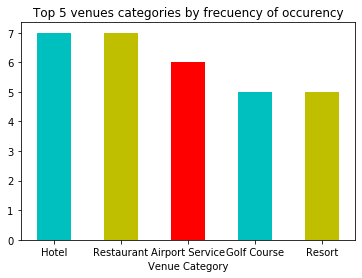

In [89]:
# creating a new dataframe and filter necesary columns,
# get only top 5 order by desc
rowset = punta_cana_venues.iloc[:,[6,3]].groupby(['Venue Category']).count().sort_values('Venue',ascending=False).head(5).reset_index()
# rename the column venue:total
rowset_plot = rowset.rename(columns = {'Venue':'Total'}).head()
# ploting
s = pd.Series(['c','y','r'], index=[1,3,2]) #colors
ax = rowset.plot.bar(x='Venue Category', y='Venue', rot=0,color=s.values,legend=False,title="Top 5 venues categories by frecuency of occurency")
# renaming the label


#### Top 5 neighborhoods by venues total

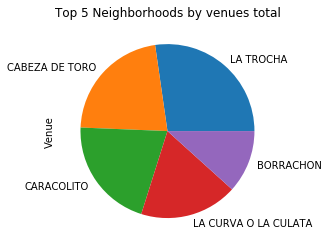

In [206]:

#top 5 neighborhoods by venues total
punta_cana_venues.iloc[:,[0,3]].groupby(['Neighborhood']).count().sort_values('Venue',ascending=False).head(5).plot.pie(y='Venue', legend=False,title="Top 5 Neighborhoods by venues total")

#### Neighborhoods by zone type

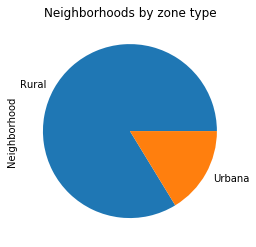

In [304]:
zone_neig_plot = df_geo_filtered[['Neighborhood','Zone']].groupby('Zone').count().head().sort_values('Neighborhood',ascending=False).plot.pie(y='Neighborhood', legend=False,title="Neighborhoods by zone type")

#### Top 5 Neighborhoods with most of the population

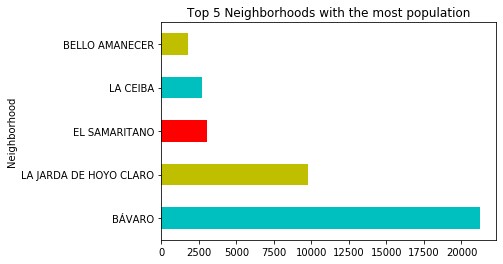

In [309]:
df_geo_filtered[['Neighborhood','Total_M_W']].sort_values('Total_M_W',ascending=False).head(5).plot.barh(x='Neighborhood', y='Total_M_W', rot=0,color=s.values,legend=False,title="Top 5 Neighborhoods with the most population")

#### Examining tourism flow data

In [320]:
#creating a new data frame from an excel file and show it
tourist_df = pd.DataFrame(pd.read_excel('tourist_flow_2019.xls'))
tourist_df.head()

,LOCATION,COUNTRY,Unnamed: 2,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,TOTAL
0,North America,Canada,NaN,178634,210177,261513,203185,210175,254169,203194,139243,61633,78672,103236,126426,2030257
1,North America,United States,NaN,126503,124662,131579,95233,46211,36792,45493,40416,20630,27438,68442,102528,865927
2,North America,Mexico,NaN,25523,29392,23687,23744,13742,11558,17632,20199,7727,13121,13960,19465,219750
3,Central America And The Caribbean,Aruba,NaN,25062,19931,20233,18013,10502,10241,12449,13993,15256,19362,24774,27266,217082
4,Central America And The Caribbean,"Caicos and Turks, Islands",NaN,19280,16209,15970,16153,19747,16127,16180,14160,12100,13614,16107,13564,189211


Top 5 countries with the most tourism flow


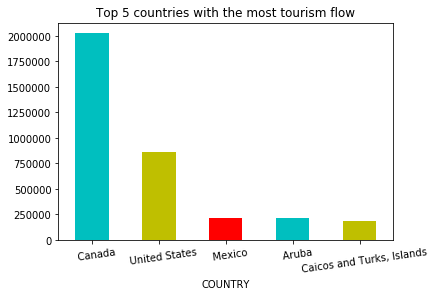

In [321]:
tourist_df[["COUNTRY","TOTAL"]].sort_values('TOTAL',ascending=False).head(5).plot.bar(x='COUNTRY', y='TOTAL', rot=8,color=s.values,legend=False,title="Top 5 countries with the most tourism flow")

#### Plotting months with the most turism flow

In [334]:
#reading the other sheet: total by month
TouristMonth = pd.DataFrame(pd.read_excel('tourist_flow_2019.xls',
sheet_name='total by month'))

#printing
print(TouristMonth.head())

#reshaping data, changing the layout of the data set and save in a new data frame
TouristMonthPlot = pd.melt(TouristMonth)
TouristMonthPlot

      ENE     FEB     MAR     ABR     MAY     JUN     JUL     AGO     SEP  \
0  678169  641168  714085  637263  574462  636105  660763  576085  385025   

      OCT     NOV     DIC  
0  425903  515166  682663  


,variable,value
0,ENE,678169
1,FEB,641168
2,MAR,714085
3,ABR,637263
4,MAY,574462
5,JUN,636105
6,JUL,660763
7,AGO,576085
8,SEP,385025
9,OCT,425903


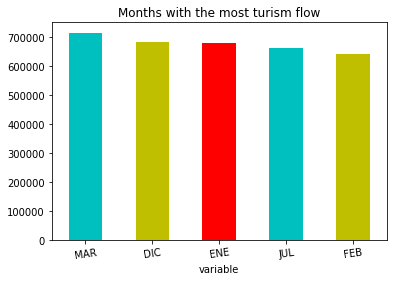

In [346]:
s = pd.Series(['c','y','r'], index=[1,3,2]) #colors
TouristMonthPlot.sort_values('value',ascending=False).head(5).plot.bar(x='variable',y='value',rot=8,color=s.values,legend=False,title="Months with the most turism flow")